#### PREPARE
modules import, clean data import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [3]:
df = pd.read_csv('../boston_clean.csv')

# BIVARIATE

## Gender x Age

In [6]:
df_gender_age = df[['M/F', 'Age']]
df_male_age = df_gender_age[df_gender_age['M/F'] == 'M']
df_female_age = df_gender_age[df_gender_age['M/F'] == 'F']

In [7]:
df_mfxage = df_gender_age.groupby(by='M/F')['Age'].agg(
    min_age='min',
    max_age='max',
    mean_age='mean',
    median_age='median')
df_mfxage

,min_age,max_age,mean_age,median_age
M/F,,,,
F,18,84,39.770577,40.0
M,18,83,44.614185,45.0


### visualization

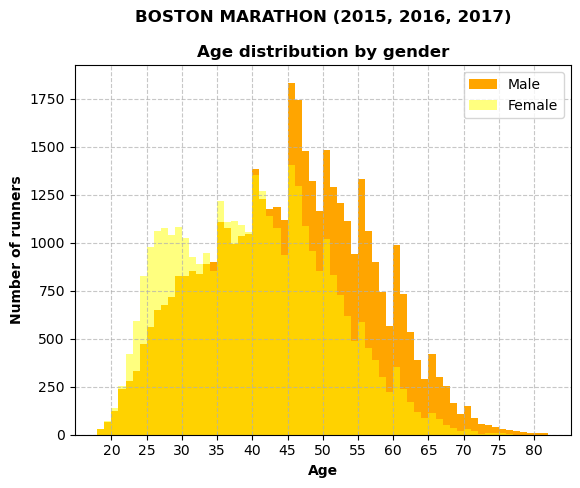

In [9]:
x_m = df_male_age['Age']
x_fm = df_female_age['Age']

plt.hist(x_m, bins= np.arange(x_m.min(), x_m.max(),1), alpha=1, color='orange', label='Male')
plt.hist(x_fm, bins= np.arange(x_m.min(), x_m.max(),1), alpha=0.5, color='yellow', label='Female')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(20,81,5))
plt.legend()

plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nAge distribution by gender', fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Number of runners', fontweight='bold')

plt.savefig("../vexport/genderxage.png", dpi=300, bbox_inches='tight')
plt.show()

#### export

In [11]:
df_mfxage.to_csv('../export/genderxage.csv')